<a href="https://colab.research.google.com/github/Muhammad-Rifky/pcvk-ganjil-2024/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [2]:
import cv2 as cv
import numpy as np
import  matplotlib.pyplot as plt

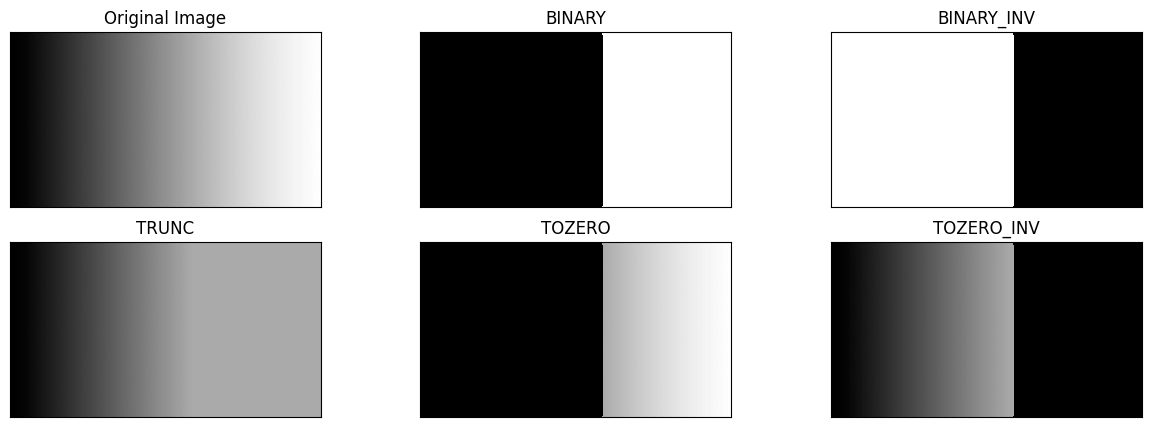

In [ ]:
#Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
#threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
#atas.


filename = ('/content/drive/MyDrive/PCVK_MR/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

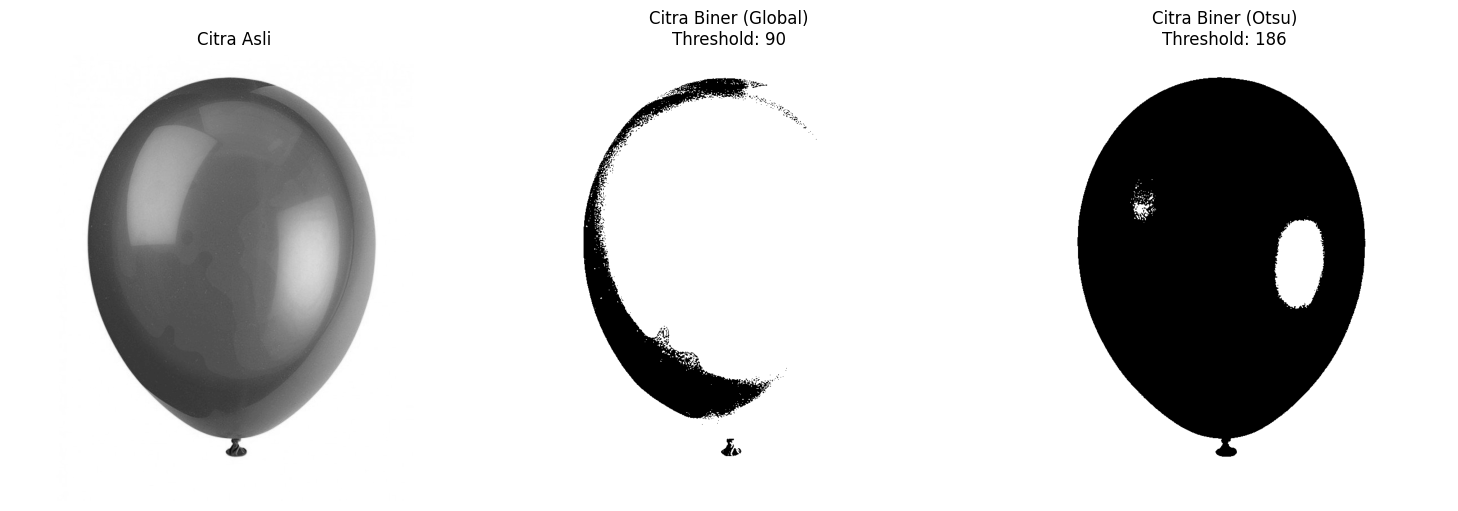

In [ ]:
#Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
#saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
#balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

def otsu_threshold(image):
    # Hitung histogram
    hist, _ = np.histogram(image, bins=256, range=(0, 256))

    total_pixels = image.size
    current_max, threshold = 0, 0
    sum_total = np.dot(np.arange(256), hist)

    background_weight = 0
    background_sum = 0

    for i in range(256):
        background_weight += hist[i]
        if background_weight == 0:
            continue

        foreground_weight = total_pixels - background_weight
        if foreground_weight == 0:
            break

        background_sum += i * hist[i]

        mean_background = background_sum / background_weight
        mean_foreground = (sum_total - background_sum) / foreground_weight

        # Variansi antar kelas
        between_class_variance = background_weight * foreground_weight * (mean_background - mean_foreground) ** 2

        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    return threshold

def global_threshold(image, threshold_value):
    """ Menerapkan global thresholding dengan nilai yang ditentukan. """
    return (image >= threshold_value).astype(np.uint8) * 255

# Membaca citra (pastikan citra grayscale)
image = plt.imread('/content/drive/MyDrive/PCVK_MR/Images/balloon.jpg')
if image.ndim == 3:  # Jika citra berwarna, konversi ke grayscale
    image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

# Menghitung threshold Otsu
otsu_threshold_value = 186

# Menerapkan global thresholding dengan threshold=170
global_threshold_value = 90
binary_global = global_threshold(image, global_threshold_value)

# Menerapkan threshold Otsu
binary_otsu = (image >= otsu_threshold_value).astype(np.uint8) * 255

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_global, cmap='gray')
plt.title(f'Citra Biner (Global)\nThreshold: {global_threshold_value}')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_otsu, cmap='gray')
plt.title(f'Citra Biner (Otsu)\nThreshold: {otsu_threshold_value}')
plt.axis('off')

plt.tight_layout()
plt.show()

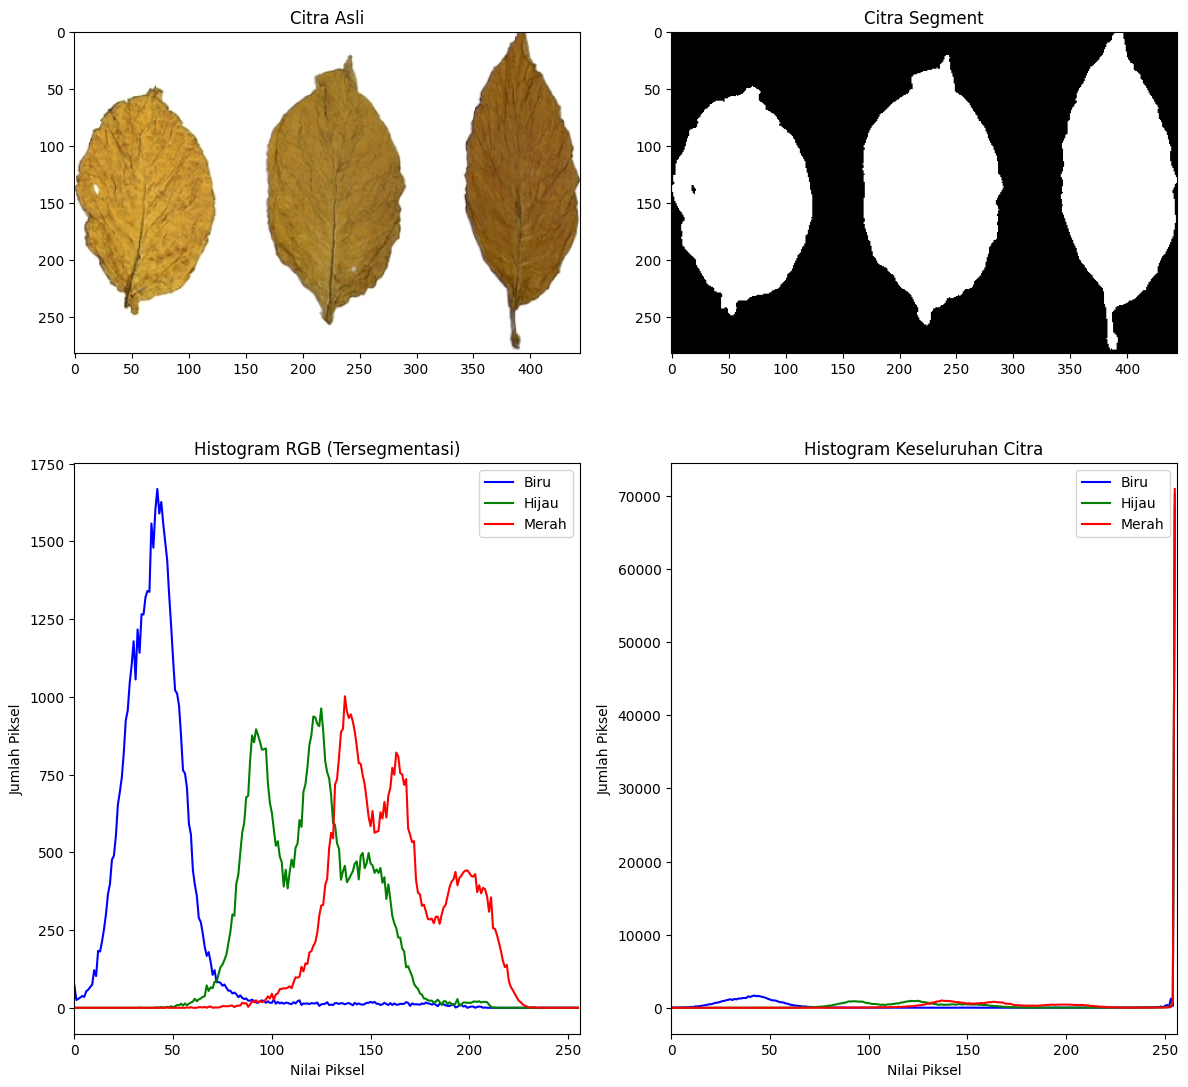

In [ ]:
#Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
#Petunjuk:
  #a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  #b. Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html
  #c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
  #histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).


import cv2
import matplotlib.pyplot as plt
import numpy as np

try:
    # Load the image
    image = cv2.imread('/content/drive/MyDrive/PCVK_MR/Images/tobacco.jpg')

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to get the segmented image
    _, mask = cv2.threshold(gray_image, 210, 255, cv2.THRESH_BINARY_INV)

    # Compute the histogram of the RGB channels
    color = ('b', 'g', 'r')
    hist_rgb = []
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], mask, [256], [0, 256])
        hist_rgb.append(hist)

    # Create a 2x2 subplot layout
    plt.figure(figsize=(12, 12))

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('on')

    # Segmented image
    plt.subplot(2, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Citra Segment')
    plt.axis('on')

    # Histogram of the RGB channels
    plt.subplot(2, 2, 3)
    plt.plot(hist_rgb[0], color='b', label='Biru')
    plt.plot(hist_rgb[1], color='g', label='Hijau')
    plt.plot(hist_rgb[2], color='r', label='Merah')
    plt.title('Histogram RGB (Tersegmentasi)')
    plt.xlabel('Nilai Piksel')
    plt.ylabel('Jumlah Piksel')
    plt.xlim([0, 256])
    plt.legend()
    plt.axis('on')

    # Overall histogram
    overall_hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
    overall_hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    overall_hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

    plt.subplot(2, 2, 4)
    plt.plot(overall_hist_b, color='b', label='Biru')
    plt.plot(overall_hist_g, color='g', label='Hijau')
    plt.plot(overall_hist_r, color='r', label='Merah')
    plt.title('Histogram Keseluruhan Citra')
    plt.xlabel('Nilai Piksel')
    plt.ylabel('Jumlah Piksel')
    plt.xlim([0, 256])
    plt.legend()
    plt.axis('on')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: 'tobacco.jpg' file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

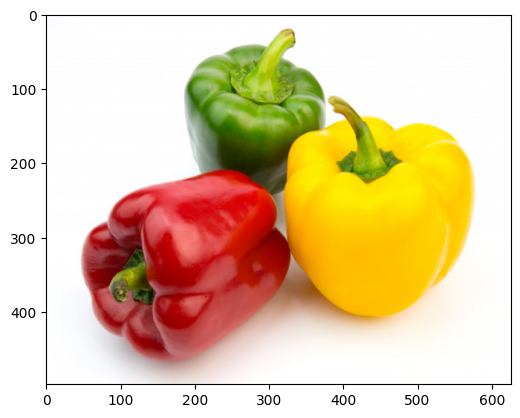

In [ ]:
img4 = cv2.imread('/content/drive/MyDrive/PCVK_MR/Images/peppers.jpg')
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

plt.imshow(img4_rgb)

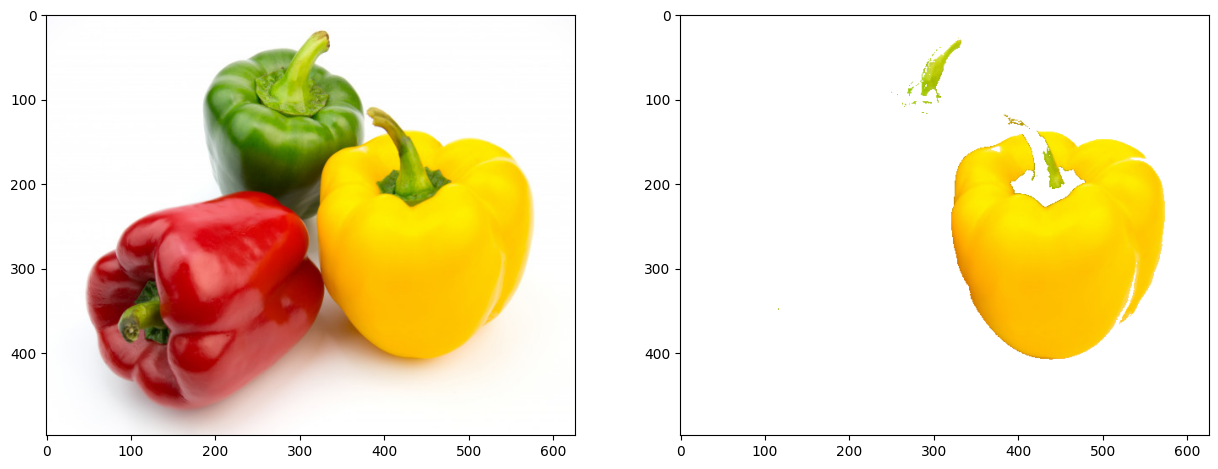

In [ ]:
from sklearn.cluster import KMeans

#reshape array ke bentuk 2D
pixel_values = img4_rgb.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img4_rgb.shape)

masked_img4 = np.copy(img4_rgb)
# konvert ke bentuk vektor
masked_img4 = masked_img4.reshape((-1, 3))
# cluster yang diubah
masked_img4[labels == 4] = [255,255,255]
masked_img4[labels == 2] = [255,255,255]
masked_img4[labels == 3] = [255,255,255]
masked_img4[labels == 1] = [255,255,255]

# konvert ke bentuk asli
masked_img4 = masked_img4.reshape(img4_rgb.shape)
plt.figure(figsize = (15,10))
plt.subplot(1,2,1),plt.imshow(img4_rgb)
plt.subplot(1,2,2),plt.imshow(masked_img4)
plt.show()

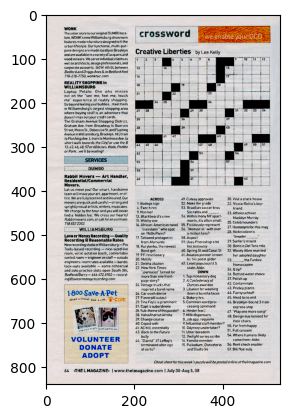

In [8]:
import cv2

img_c = cv2.imread('/content/drive/MyDrive/PCVK_MR/Images/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()